In [2]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
mpl.rcParams['font.family'] = 'NanumGothic' 
df = pd.read_csv('Student Attitude and Behavior.csv')

In [3]:
df.head()

,Certification Course,Gender,Department,Height(CM),Weight(KG),10th Mark,12th Mark,college mark,hobbies,daily studing time,prefer to study in,salary expectation,Do you like your degree?,willingness to pursue a career based on their degree,social medai & video,Travelling Time,Stress Level,Financial Status,part-time job
0,No,Male,BCA,100.0,58.0,79.0,64.0,80.0,Video Games,0 - 30 minute,Morning,40000,No,50%,1.30 - 2 hour,30 - 60 minutes,Bad,Bad,No
1,No,Female,BCA,90.0,40.0,70.0,80.0,70.0,Cinema,30 - 60 minute,Morning,15000,Yes,75%,1 - 1.30 hour,0 - 30 minutes,Bad,Bad,No
2,Yes,Male,BCA,159.0,78.0,71.0,61.0,55.0,Cinema,1 - 2 Hour,Anytime,13000,Yes,50%,More than 2 hour,30 - 60 minutes,Awful,Bad,No
3,Yes,Female,BCA,147.0,20.0,70.0,59.0,58.0,Reading books,1 - 2 Hour,Anytime,1500000,No,50%,1.30 - 2 hour,0 - 30 minutes,Bad,good,No
4,No,Male,BCA,170.0,54.0,40.0,65.0,30.0,Video Games,30 - 60 minute,Morning,50000,Yes,25%,1.30 - 2 hour,30 - 60 minutes,Good,good,No


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 19 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Certification Course                                    235 non-null    object 
 1   Gender                                                  235 non-null    object 
 2   Department                                              235 non-null    object 
 3   Height(CM)                                              235 non-null    float64
 4   Weight(KG)                                              235 non-null    float64
 5   10th Mark                                               235 non-null    float64
 6   12th Mark                                               235 non-null    float64
 7   college mark                                            235 non-null    float64
 8   hobbies                                 

In [47]:
df.rename(columns={'daily studing time': 'daily studying time'}, inplace=True)
print(df.columns)

Index(['Certification Course', 'Gender', 'Department', 'Height(CM)',
       'Weight(KG)', '10th Mark', '12th Mark', 'college mark', 'hobbies',
       'daily studying time', 'prefer to study in', 'salary expectation',
       'Do you like your degree?',
       'willingness to pursue a career based on their degree  ',
       'social medai & video', 'Travelling Time ', 'Stress Level ',
       'Financial Status', 'part-time job'],
      dtype='object')


In [48]:
# 결측치 확인
print(df.isnull().sum())

Certification Course                                      0
Gender                                                    0
Department                                                0
Height(CM)                                                0
Weight(KG)                                                0
10th Mark                                                 0
12th Mark                                                 0
college mark                                              0
hobbies                                                   0
daily studying time                                       0
prefer to study in                                        0
salary expectation                                        0
Do you like your degree?                                  0
willingness to pursue a career based on their degree      0
social medai & video                                      0
Travelling Time                                           0
Stress Level                            

In [3]:
df.describe()

,Height(CM),Weight(KG),10th Mark,12th Mark,college mark,salary expectation
count,235.000000,235.000000,235.000000,235.000000,235.000000,2.350000e+02
mean,157.402128,60.803830,76.848511,68.775872,70.660553,3.248168e+04
std,21.510805,14.895844,13.047560,11.018192,15.727446,1.113146e+05
min,4.500000,20.000000,7.400000,45.000000,1.000000,0.000000e+00
25%,152.000000,50.000000,70.000000,60.000000,60.000000,1.500000e+04
50%,160.000000,60.000000,80.000000,69.000000,70.000000,2.000000e+04
75%,170.000000,70.000000,86.250000,76.000000,80.000000,2.500000e+04
max,192.000000,106.000000,98.000000,94.000000,100.000000,1.500000e+06


In [50]:
# 1. 대학 성적(college mark)과 일일 공부 시간(daily studying time)의 관계를 탐구하여 두 변수 간의 상관관계 및 패턴을 파악

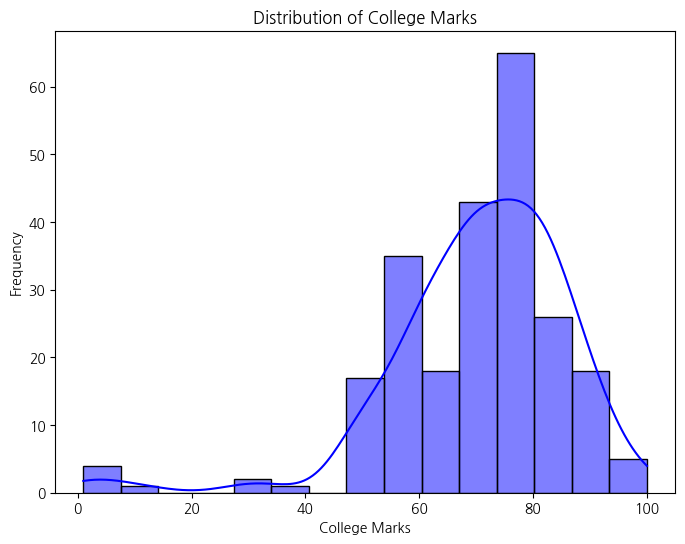

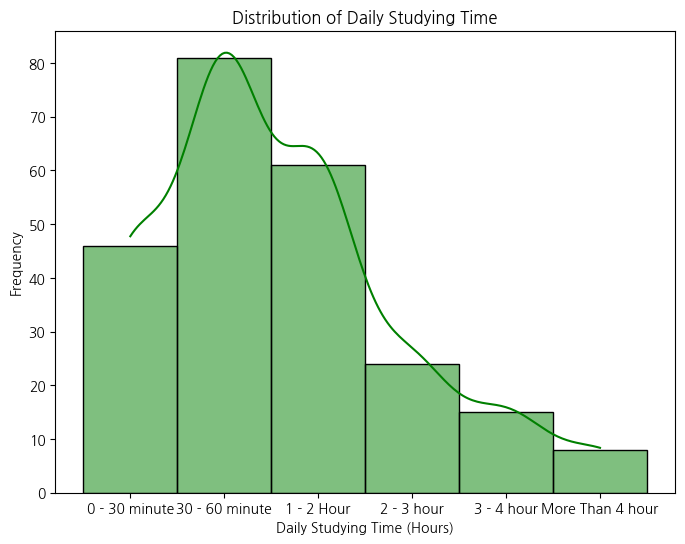

In [51]:
# Distribution of college marks
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='college mark', kde=True, color='blue', bins=15)
plt.title('Distribution of College Marks')
plt.xlabel('College Marks')
plt.ylabel('Frequency')
plt.show()

# 일일 공부시간 분포
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='daily studying time', kde=True, color='green', bins=10)
plt.title('Distribution of Daily Studying Time')
plt.xlabel('Daily Studying Time (Hours)')
plt.ylabel('Frequency')
plt.show()

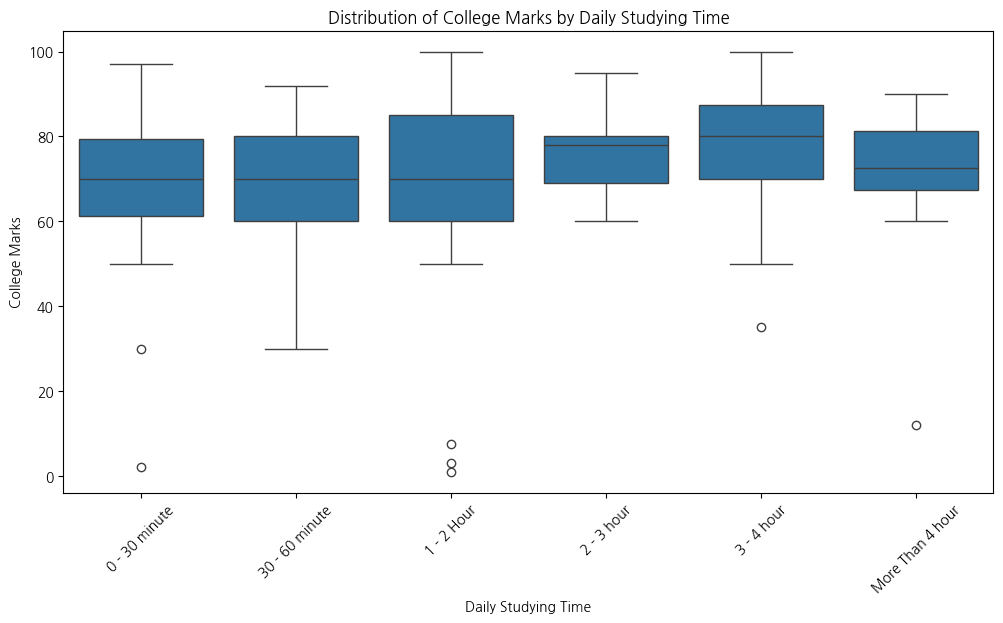

In [52]:
# 전체 대학 성적의 분포를 플롯으로 표현
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='daily studying time', y='college mark')
plt.title('Distribution of College Marks by Daily Studying Time')
plt.xlabel('Daily Studying Time')
plt.ylabel('College Marks')
plt.xticks(rotation=45)
plt.show()

boxplot의 이상치를 제거하지 않은 이유? -> 이 데이터셋의 경우, 이상치는 오히려 해당 범주 내에서 현실적으로 존재할 수 있는 극단적 사례를 보여주므로 함부로 제거하지 않았다. 예를 들어, "4hour" 그룹에서 매우 낮은 성적을 받은 학생은 단순히 이상한 값이 아니라, 많은 시간을 투자했음에도 불구하고 원하는 성취를 얻지 못한 특이한 사례일 수 있기 때문이다

In [ ]:
#공부시간에 따라 그룹화
grouped_counts = df.groupby('daily studying time')['college mark'].count().reset_index()

grouped_counts

데이터셋에 정확한 시간으로 나와있는 것이 아닌 구간 단위로 나와있어 정규성 검정이 어려움. 이미 그룹화된 형태의 범주형 독립변수(공부시간 구간)에 대해 비모수 검정을 시도하였다. 이를 위해 Kruskal-Wallis 검정을 통해 여러 집단 간 중앙값 차이를 검정하는 방법을 사용하였다.

In [55]:
import pandas as pd
import numpy as np
import scipy.stats as stats
# daily studying time 컬럼에 이미 그룹을 나타내는 카테고리(예: '0 - 30 minute', '30 - 60 minute', ...)가 있다고 가정
# 그룹명 추출
groups = df['daily studying time'].unique()

# 각 그룹별 college mark 데이터 추출 (NaN 제거)
group_data = [df.loc[df['daily studying time'] == g, 'college mark'].dropna() for g in groups]

# Kruskal-Wallis 검정 수행
stat, p_value = stats.kruskal(*group_data)

print("Kruskal-Wallis Test 결과:")
print(f"H-statistic = {stat:.4f}, p-value = {p_value:.4f}")

if p_value < 0.05:
    print("유의수준 0.05에서 그룹 간 중위수에 유의한 차이가 있습니다.")
else:
    print("유의수준 0.05에서 그룹 간 중위수에 유의한 차이가 없다고 볼 수 있습니다.")

Kruskal-Wallis Test 결과:
H-statistic = 8.0479, p-value = 0.1536
유의수준 0.05에서 그룹 간 중위수에 유의한 차이가 없다고 볼 수 있습니다.


Kruskal-Wallis Test 결과:
H-statistic = 8.0479, p-value = 0.1536
유의수준 0.05에서 그룹 간 중위수에 유의한 차이가 없다고 볼 수 있습니다.
p-value가 0.05를 초과해 통계적 유의성이 없어 보인다고 해석할 수 있다. 이 결과를 통해 단일 변수(일일 공부시간)로는 성적 차이를 충분히 설명하기 어렵다는 시사점이며, 이는 곧 다른 변수를 종합적으로 고려하는 다변량적 접근이 필요함을 알리는 신호로 해석할 수 있다.

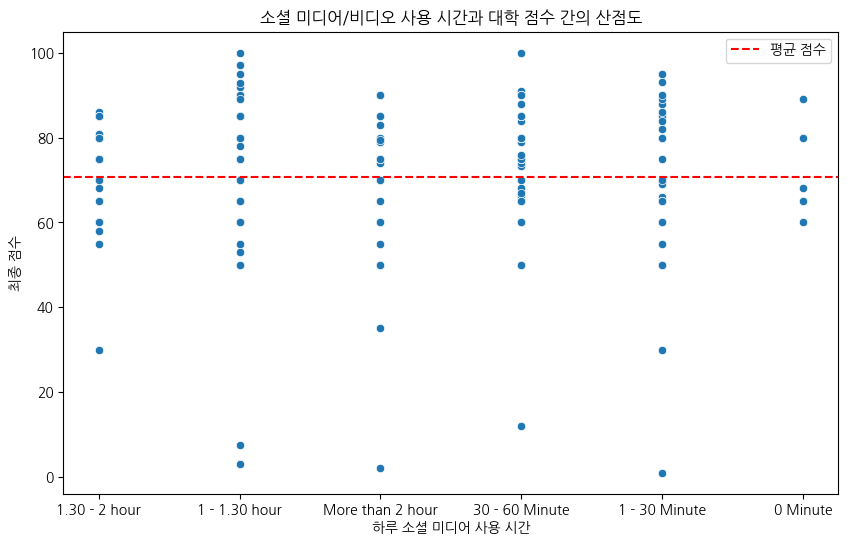

In [14]:
# 2. 소셜 미디어/비디오 사용 시간과 대학 점수 간의 관계
plt.figure(figsize = (10, 6))
sns.scatterplot(df, x = "social medai & video", y = "college mark")
plt.title("소셜 미디어/비디오 사용 시간과 대학 점수 간의 산점도")
plt.xlabel("하루 소셜 미디어 사용 시간")
plt.ylabel("최종 점수")
plt.axhline(y=df["college mark"].mean(), color='r', linestyle='--', label='평균 점수')
plt.legend()
plt.show()

In [20]:
# social media & videos 행 숫자로 변경
def convert_hours(time):
    time = time.strip()
    if "0 Minute" == time :
        return 0
    elif "1 - 30 Minute" == time:
        return 0.25
    elif "30 - 60 Minute" == time:
        return 0.75
    elif "1 - 1.30 hour" == time:
        return 1.25
    elif "1.30 - 2 hour" == time:
        return 1.75
    elif "More than 2 hour" == time:
        return 2.25
        
df["social medai & video hours"] = df["social medai & video"].apply(convert_hours)

#1을 기준으로 1시간 이하 사용, 1시간 이상 사용으로 그룹화 
median = 1
low_use = df[df["social medai & video hours"] <= median]["college mark"]
high_use = df[df["social medai & video hours"] > median]["college mark"]

In [21]:
# normal
from scipy.stats import shapiro

print(shapiro(low_use))
print(shapiro(high_use))
# 두 그룹 모두 p < 0.05 이므로 '데이터가 정규성을 따른다'는 귀무가설 기각
# 즉, 정규성을 만족하지 않는다.

ShapiroResult(statistic=0.9056748151779175, pvalue=3.5317336255502596e-07)
ShapiroResult(statistic=0.8488395810127258, pvalue=1.9900090464375353e-09)


In [22]:
from scipy.stats import bartlett

stat, p = bartlett(low_use, high_use)
print(stat, p) 
#p > 0.05 이므로 '분산이 동일하다'는 귀무가설 기각하지 않음
#즉, 분산이 동일하다고 볼 수 있음

0.8307362852305175 0.3620597108450082


In [39]:
#분산은 동일하지만 정규성을 만족하지 못하므로 t-test 사용하지 않고 kruskal 검정 사용

from scipy.stats import kruskal

stat, p = kruskal(low_use, high_use)
print(stat, p)
# P> 0.05 이상 이므로 '두 그룹의 중앙값은 같다'는 귀무가설 기각하지 못함
# 즉, '소셜미디어와 비디오의 사용 시간은 대학 성적과 관계가 없다'는 결론 도출

0.39146744991749033 0.5315290547250976


In [ ]:
# 3. Stress Level과 college mark의 관계

In [27]:
# Stress Level 값 분포 확인
print(df['Stress Level '].value_counts())

Stress Level 
Good        137
Bad          68
Awful        19
fabulous     11
Name: count, dtype: int64


In [31]:
# Stress Level을 수치형으로 매핑
stress_mapping = {'Good': 1, 'fabulous': 2, 'Bad': 3, 'Awful': 4}
df['Stress Level '] = df['Stress Level '].map(stress_mapping)

print(df['Stress Level '].value_counts())

Stress Level 
1    137
3     68
4     19
2     11
Name: count, dtype: int64


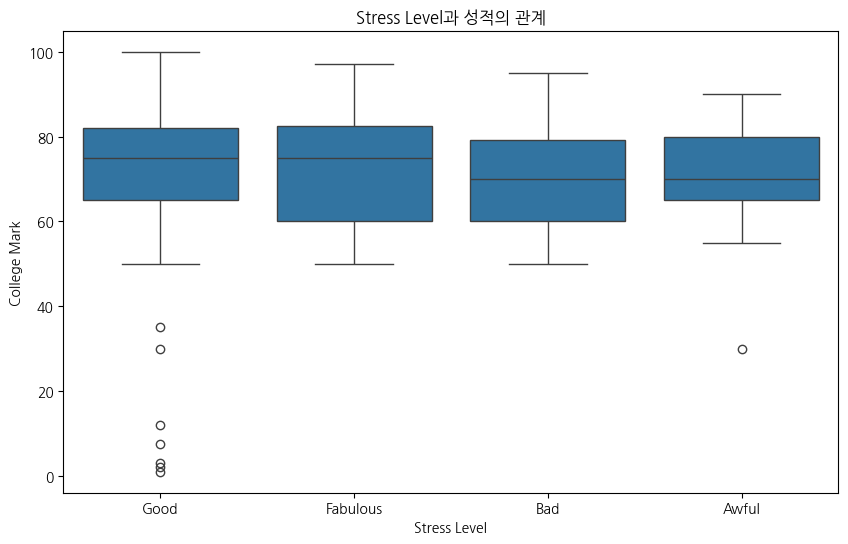

In [32]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Stress Level ', y='college mark', data=df)
plt.title('Stress Level과 성적의 관계')
plt.xlabel('Stress Level')
plt.ylabel('College Mark')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Good', 'Fabulous', 'Bad', 'Awful'])
plt.show()

In [33]:
from scipy.stats import shapiro

# 시험 성적 정규성 검정
stat_college, p_college = shapiro(df['college mark'])
print(f"시험 성적 정규성 검정: {stat_college:.3f}, p-value = {p_college}") # 정규성을 따르지 않는다.

# 스트레스 레벨 정규성 검정
stat_stress, p_stress = shapiro(df['Stress Level '])
print(f"스트레스 레벨 정규성 검정: {stat_stress:.3f}, p-value = {p_stress}") # 정규성을 따르지 않는다.

시험 성적 정규성 검정: 0.879, p-value = 1.0397339456416632e-12
스트레스 레벨 정규성 검정: 0.715, p-value = 8.73832242007826e-20


In [35]:
from scipy.stats import levene

# 스트레스 레벨 별 그룹
stress_groups = df.groupby('Stress Level ')['college mark'].apply(list)

# 등분산성 검정
stat_levene, p_levene = levene(*stress_groups)
print(f"등분산성 검정: {stat_levene:.3f}, p-value = {p_levene}") # 등분산성을 만족한다.

등분산성 검정: 0.920, p-value = 0.4319077163743922


In [37]:
from scipy.stats import kruskal

stress_groups = df.groupby('Stress Level ')['college mark'].apply(list)

stat_kruskal, p_kruskal = kruskal(*stress_groups)

print(f"Kruskal-Wallis 검정 통계량: {stat_kruskal:.3f}, p-value = {p_kruskal:.3f}")

if p_kruskal < 0.05:
    print("p-value가 0.05보다 작으므로, 스트레스 레벨 그룹 간 성적에 유의미한 차이가 있습니다.")
else:
    print("p-value가 0.05보다 크므로, 스트레스 레벨 그룹 간 성적에 유의미한 차이가 없습니다.")

Kruskal-Wallis 검정 통계량: 7.114, p-value = 0.068
p-value가 0.05보다 크므로, 스트레스 레벨 그룹 간 성적에 유의미한 차이가 없습니다.


In [ ]:
# 4. 학생이 공부를 선호하는 시간(prefer to study in)에 따른 대학 성적(college mark)이 차이가 있을까??

In [4]:
df['prefer to study in'].unique()

array(['Morning', 'Anytime', 'Night'], dtype=object)

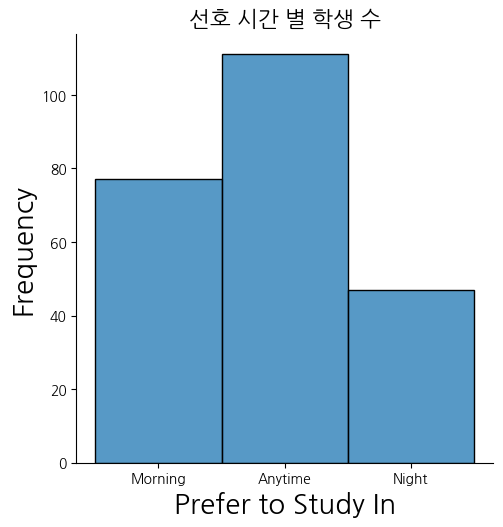

In [5]:
import seaborn as sns

sns.displot(df['prefer to study in'])

# 폰트 크기 설정
plt.xlabel('Prefer to Study In', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.title('선호 시간 별 학생 수', fontsize=16)

# 그래프 보여주기
plt.show()

In [6]:
## normality check

C:\ProgramData\Anaconda3\envs\sda2024\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\ProgramData\Anaconda3\envs\sda2024\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


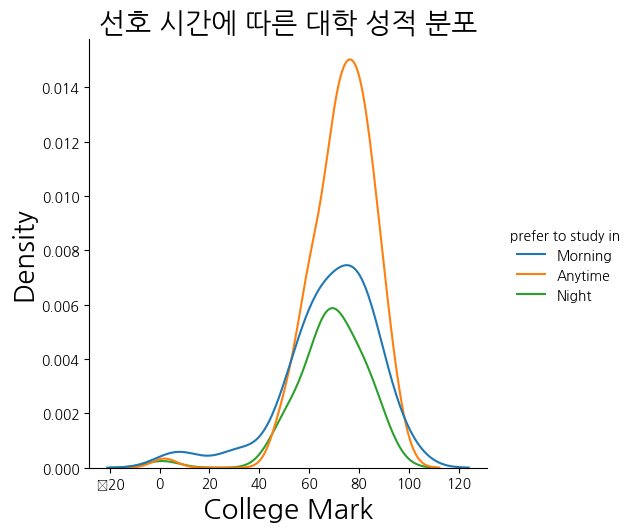

In [7]:
sns.displot(data = df, x = 'college mark', hue = 'prefer to study in', kind = 'kde')

# 폰트 크기 설정
plt.xlabel('College Mark', fontsize=20)
plt.ylabel('Density', fontsize=20)
plt.title('선호 시간에 따른 대학 성적 분포', fontsize=20)

# 그래프 보여주기
plt.show()

C:\ProgramData\Anaconda3\envs\sda2024\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


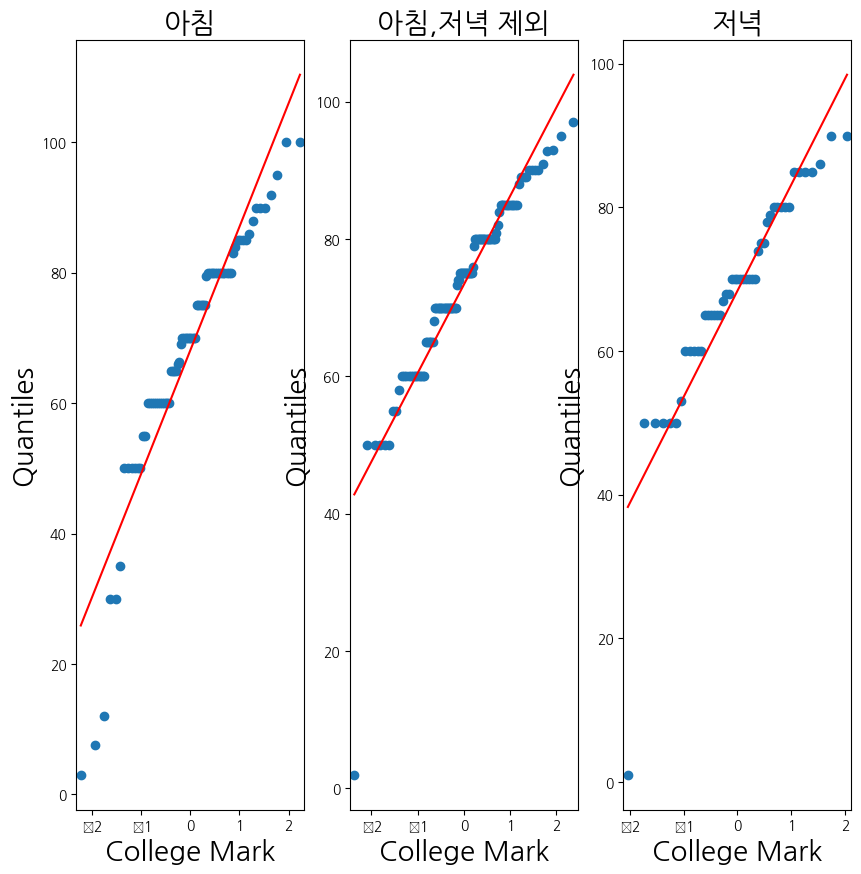

In [8]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1,3, figsize = (10,10))

# Morning
sm.qqplot(df[df['prefer to study in'] == 'Morning']['college mark'], ax = axes[0],line = 's')
axes[0].set_title('아침', fontsize=20)
axes[0].set_xlabel('College Mark', fontsize=20)  # x축 이름 설정
axes[0].set_ylabel('Quantiles', fontsize=20)    # y축 이름 설정

# Anytime
sm.qqplot(df[df['prefer to study in'] == 'Anytime']['college mark'], ax = axes[1],line = 's')
axes[1].set_title('아침,저녁 제외', fontsize=20)
axes[1].set_xlabel('College Mark', fontsize=20)  # x축 이름 설정
axes[1].set_ylabel('Quantiles', fontsize=20)    # y축 이름 설정

# Night
sm.qqplot(df[df['prefer to study in'] == 'Night']['college mark'], ax = axes[2],line = 's')
axes[2].set_title('저녁', fontsize=20)
axes[2].set_xlabel('College Mark', fontsize=20)  # x축 이름 설정
axes[2].set_ylabel('Quantiles', fontsize=20)    # y축 이름 설정

plt.show()

<Figure size 600x600 with 0 Axes>

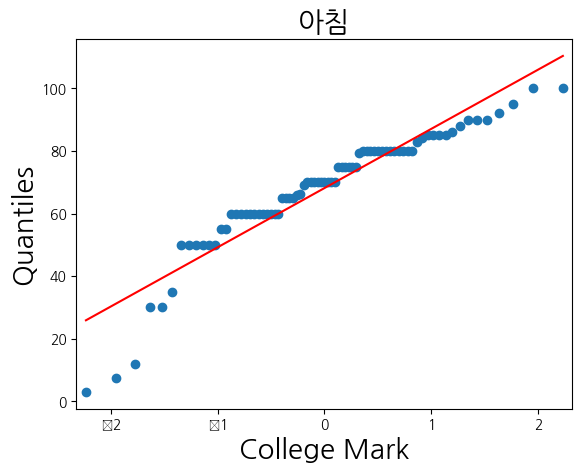

In [10]:
# 따로 나눠서 plot
# Morning
plt.figure(figsize=(6, 6))
sm.qqplot(df[df['prefer to study in'] == 'Morning']['college mark'], line='s')
plt.title('아침', fontsize=20)
plt.xlabel('College Mark', fontsize=20)  # x축 이름 설정
plt.ylabel('Quantiles', fontsize=20)    # y축 이름 설정
plt.show()
# # Anytime
# plt.figure(figsize=(6, 6))
# sm.qqplot(df[df['prefer to study in'] == 'Anytime']['college mark'], line='s')
# plt.title('아침 저녁 제외', fontsize=20)
# plt.xlabel('College Mark', fontsize=20)  # x축 이름 설정
# plt.ylabel('Quantiles', fontsize=20)    # y축 이름 설정
# plt.show()
# # Night
# plt.figure(figsize=(6, 6))
# sm.qqplot(df[df['prefer to study in'] == 'Night']['college mark'], line='s')
# plt.title('저녁', fontsize=20)
# plt.xlabel('College Mark', fontsize=20)  # x축 이름 설정
# plt.ylabel('Quantiles', fontsize=20)    # y축 이름 설정
# plt.show()

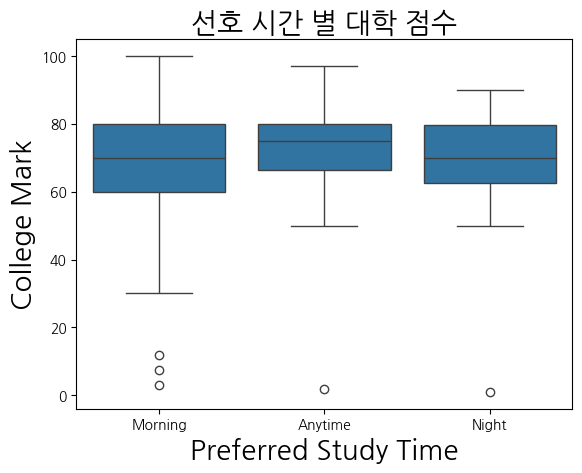

In [11]:
import seaborn as sns

sns.boxplot(data = df, x = 'prefer to study in', y = 'college mark')
# 폰트 크기 설정
plt.xlabel('Preferred Study Time', fontsize=20)  # x축 제목
plt.ylabel('College Mark', fontsize=20)          # y축 제목
plt.title('선호 시간 별 대학 점수', fontsize=20)  # 그래프 제목

# 그래프 보여주기
plt.show()

In [12]:
## Q.이상치를 제거할지 말지에 대한 의견 작성
df_college_mark_counts = (df['college mark'] < 20).sum()
df_college_mark_counts

5

In [13]:
lower_df = df[df['college mark'] < 20]
lower_df

,Certification Course,Gender,Department,Height(CM),Weight(KG),10th Mark,12th Mark,college mark,hobbies,daily studing time,prefer to study in,salary expectation,Do you like your degree?,willingness to pursue a career based on their degree,social medai & video,Travelling Time,Stress Level,Financial Status,part-time job
6,Yes,Male,BCA,165.0,50.0,70.0,63.0,3.0,Reading books,1 - 2 Hour,Morning,15000,Yes,75%,1 - 1.30 hour,1 - 1.30 hour,Good,good,No
49,No,Male,B.com Accounting and Finance,155.0,55.0,73.0,72.0,1.0,Reading books,1 - 2 Hour,Night,15000,Yes,75%,1 - 30 Minute,30 - 60 minutes,Good,good,No
93,No,Male,BCA,175.0,65.0,76.0,70.0,7.5,Sports,1 - 2 Hour,Morning,15000,No,50%,1 - 1.30 hour,30 - 60 minutes,Good,good,No
148,No,Female,B.com Accounting and Finance,130.0,35.0,80.2,70.0,12.0,Reading books,More Than 4 hour,Morning,30000,No,50%,30 - 60 Minute,1 - 1.30 hour,Good,Bad,No
183,Yes,Male,B.com ISM,173.0,92.0,54.0,65.0,2.0,Cinema,0 - 30 minute,Anytime,23000,Yes,100%,More than 2 hour,1 - 1.30 hour,Good,good,No


In [14]:
##의견ps. 이상치 제거 여부 => not equal 0이고, 샘플 수가 적기 때문에 
##        이상치 제거 안하고 분석 진행!

In [15]:
# normal
from scipy.stats import shapiro

print(shapiro(df[df['prefer to study in'] == 'Morning']['college mark']))
print(shapiro(df[df['prefer to study in'] == 'Anytime']['college mark']))
print(shapiro(df[df['prefer to study in'] == 'Night']['college mark']))

ShapiroResult(statistic=0.8990122079849243, pvalue=1.5592280760756694e-05)
ShapiroResult(statistic=0.8948537707328796, pvalue=2.629093387440662e-07)
ShapiroResult(statistic=0.8447308540344238, pvalue=1.88336125575006e-05)


A. shapiro test 결과, 세 가지 그룹에 대해 모두 귀무가설 기각, normal을 따르지 않는다고 판단.

In [17]:
## equal variance test
from scipy.stats import levene
levene(df[df['prefer to study in'] == 'Morning']['college mark'],
        df[df['prefer to study in'] == 'Anytime']['college mark'],
        df[df['prefer to study in'] == 'Night']['college mark'])

LeveneResult(statistic=3.705792012954079, pvalue=0.026047597758914846)

A. levene test 결과, p-value < 0.05로 귀무가설 기각, 즉 분산이 같지 않다고 판단.

In [ ]:
## ANOVA test
from scipy.stats import kruskal
kruskal(df[df['prefer to study in'] == 'Morning']['college mark'],
        df[df['prefer to study in'] == 'Anytime']['college mark'],
        df[df['prefer to study in'] == 'Night']['college mark'])

normal을 따르지 않고 분산이 같지 않다고 판단하여, kruskal test를 수행한 결과, p-value > 0.05로 귀무가설 채택.
공부를 선호하는 시간(prefer to study in)에 따른 대학 성적(college mark)이 유의미한 차이가 없다고 결론을 냄.

In [18]:
# 5. 학생의 12학년 성적(12th Mark)와 대학 성정(college mark)의 관계(correlation)가 있을까?

In [19]:
# 먼저, 12th mark와 college mark의 분포 확인

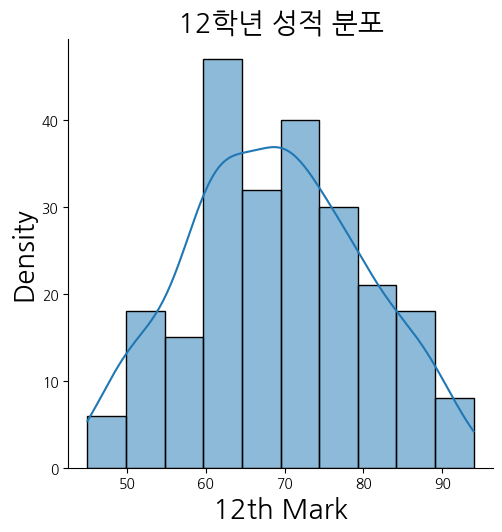

ShapiroResult(statistic=0.9843690991401672, pvalue=0.010986778885126114)


In [20]:
sns.displot(df['12th Mark'], kde=True)

# 폰트 크기 설정
plt.xlabel('12th Mark', fontsize=20)  # x축 제목
plt.ylabel('Density', fontsize=20)     # y축 제목
plt.title('12학년 성적 분포', fontsize=20)  # 그래프 제목

# 그래프 보여주기
plt.show()
print(shapiro(df['12th Mark']))

ShapiroResult(statistic=0.8794555068016052, pvalue=1.0397339456416632e-12)


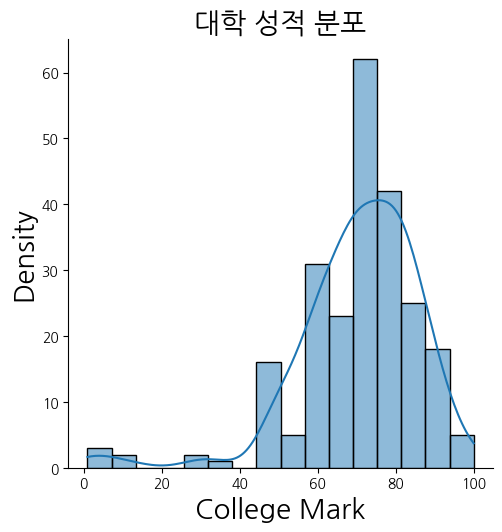

In [21]:
sns.displot(df['college mark'], kde=True)
print(shapiro(df['college mark']))

# 폰트 크기 설정
plt.xlabel('College Mark', fontsize=20)  # x축 제목
plt.ylabel('Density', fontsize=20)       # y축 제목
plt.title('대학 성적 분포', fontsize=20)  # 그래프 제목

# 그래프 보여주기
plt.show()

In [22]:
## correlation test

SignificanceResult(statistic=0.5105157446127417, pvalue=5.337604931231386e-17)


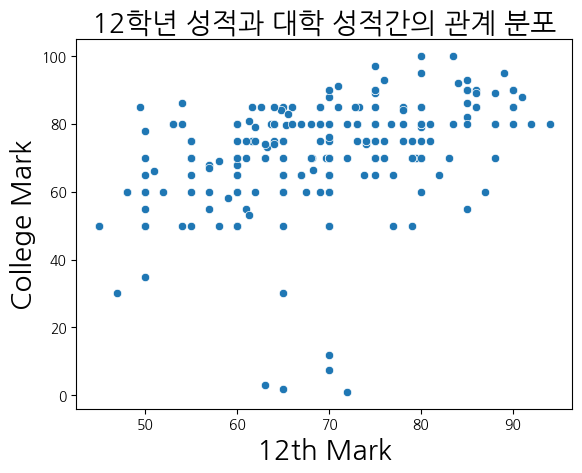

In [23]:
from scipy.stats import spearmanr

sns.scatterplot(x='12th Mark', y='college mark', data=df)
print(spearmanr(df['12th Mark'],df['college mark']))

# 폰트 크기 설정
plt.xlabel('12th Mark', fontsize=20)    # x축 제목
plt.ylabel('College Mark', fontsize=20)  # y축 제목
plt.title('12학년 성적과 대학 성적간의 관계 분포', fontsize=20)  # 그래프 제목

# 그래프 보여주기
plt.show()

A. normal하지 않으므로, spearman correlation test 수행한 결과, p-value < 0.05로 귀무가설 기각
<br>학생의 12학년 성적(12th Mark)와 대학 성정(college mark)의 관계(correlation)가 있다고 판단! 

In [24]:
# 6. regression (10th mark college mark)

In [25]:
df.describe()

,Height(CM),Weight(KG),10th Mark,12th Mark,college mark,salary expectation
count,235.000000,235.000000,235.000000,235.000000,235.000000,2.350000e+02
mean,157.402128,60.803830,76.848511,68.775872,70.660553,3.248168e+04
std,21.510805,14.895844,13.047560,11.018192,15.727446,1.113146e+05
min,4.500000,20.000000,7.400000,45.000000,1.000000,0.000000e+00
25%,152.000000,50.000000,70.000000,60.000000,60.000000,1.500000e+04
50%,160.000000,60.000000,80.000000,69.000000,70.000000,2.000000e+04
75%,170.000000,70.000000,86.250000,76.000000,80.000000,2.500000e+04
max,192.000000,106.000000,98.000000,94.000000,100.000000,1.500000e+06


In [26]:
## height, weight은 관련 없다고 판단.
## pair plot

<Figure size 1000x800 with 0 Axes>

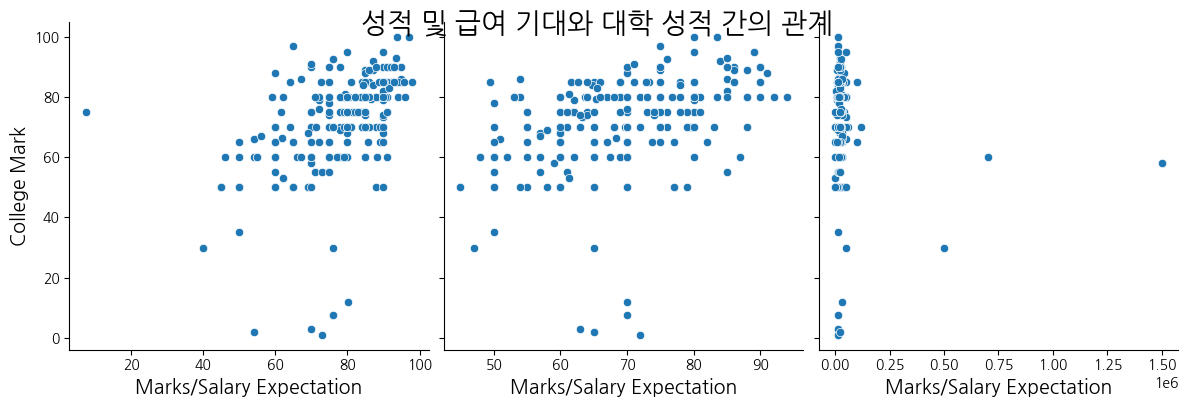

In [27]:
plt.figure(figsize=(10, 8))
pair_plot = sns.pairplot(df, x_vars=['10th Mark', '12th Mark', 'salary expectation'], 
                         y_vars=['college mark'], height=4, aspect=1, kind='scatter')
plt.suptitle('성적 및 급여 기대와 대학 성적 간의 관계', fontsize=20)  # 전체 제목 설정
# 각 축 제목 설정 (x, y 축 제목은 pairplot이 자동으로 설정하므로 개별적으로 변경 필요)
for ax in pair_plot.axes.flatten():
    ax.set_xlabel('Marks/Salary Expectation', fontsize=14)  # x축 제목
    ax.set_ylabel('College Mark', fontsize=14)  # y축 제목

# 제목이 겹치지 않도록 조정
plt.subplots_adjust(top=0.95)

# 그래프 보여주기
plt.show()

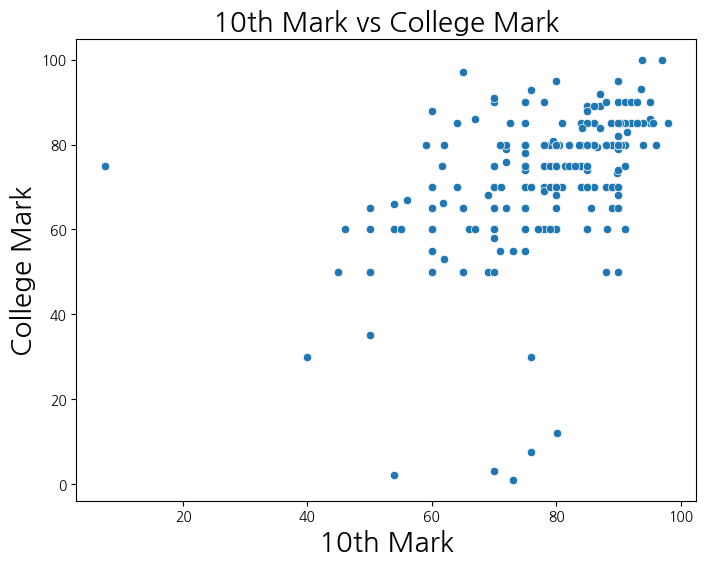

In [28]:
#따로 나눠서 plot 
# 10th Mark와 College Mark 관계
plt.figure(figsize=(8, 6))
sns.scatterplot(x='10th Mark', y='college mark', data=df)
plt.title('10th Mark vs College Mark', fontsize=20)
plt.xlabel('10th Mark', fontsize=20)
plt.ylabel('College Mark', fontsize=20)
plt.show()
# # 12th Mark와 College Mark 관계
# plt.figure(figsize=(8, 6))
# sns.scatterplot(x='12th Mark', y='college mark', data=df)
# plt.title('12th Mark vs College Mark', fontsize=20)
# plt.xlabel('12th Mark', fontsize=20)
# plt.ylabel('College Mark', fontsize=20)
# plt.show()
# # Salary Expectation과 College Mark 관계
# plt.figure(figsize=(8, 6))
# sns.scatterplot(x='salary expectation', y='college mark', data=df)
# plt.title('Salary Expectation vs College Mark', fontsize=20)
# plt.xlabel('Salary Expectation', fontsize=20)
# plt.ylabel('College Mark', fontsize=20)
# plt.show()

In [29]:
## 10th mark, 12th mark, salary expection과 college mark 간의 관계중
## pair plot을 그려본 결과
## 10th mark와 college mark 간에 선형 관계, effect가 큰 걸로 보임.

In [30]:
## linear regresssion

In [31]:
import statsmodels.api as sm

# 독립 변수와 종속 변수 설정
X = df[['10th Mark']]  # 독립 변수
y = df['college mark']  # 종속 변수

# 상수항 추가
X_const = sm.add_constant(X)
# print(X_const.head())

lr = sm.OLS(y, X_const).fit()
print(lr.params)

const        27.506628
10th Mark     0.561545
dtype: float64


In [32]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:           college mark   R-squared:                       0.217
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     64.58
Date:                Sat, 07 Dec 2024   Prob (F-statistic):           4.62e-14
Time:                        04:54:18   Log-Likelihood:                -951.72
No. Observations:                 235   AIC:                             1907.
Df Residuals:                     233   BIC:                             1914.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         27.5066      5.446      5.050      0.0

A. R-squared값 0.217<br>
college mark의 변동 중 21.7% 변동을 10th Mark가 설명<br>
설명력이 낮다는 결론을 냄. 다른 변수들 추가 필요할 수 있음.<br>
10th mark는 college mark에 유의미한 영향을 미칠 수 있음.<br>
inference를 위한 조건에 부합하지 않는 부분 존재<br>
추후 연구 필요!

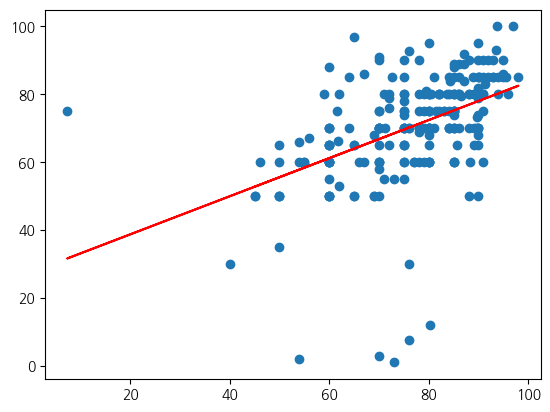

In [33]:
plt.scatter(X,y)
plt.plot(X,0.5615*X + 27.5066, 'r')
plt.show()

In [34]:
## 7. regression(12th mark college mark)

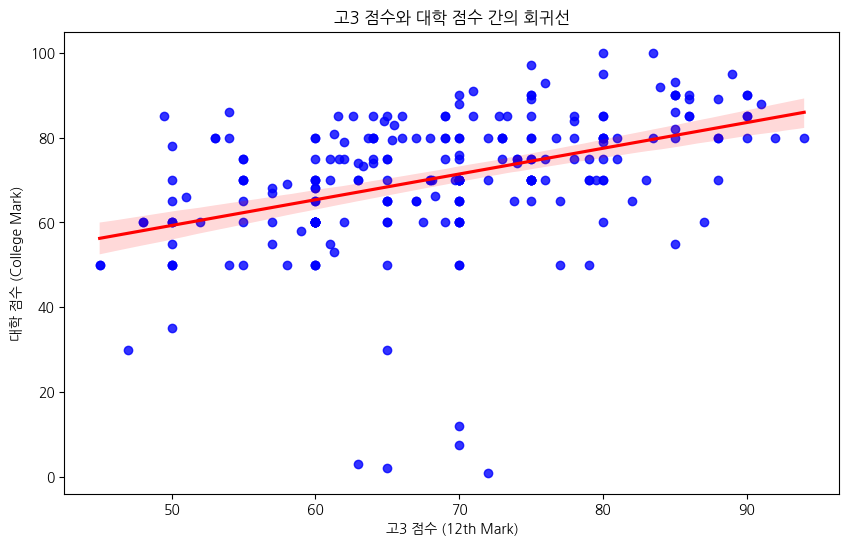

In [37]:
plt.figure(figsize=(10, 6))
sns.regplot(x='12th Mark', y='college mark', data=df, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title('고3 점수와 대학 점수 간의 회귀선')
plt.xlabel('고3 점수 (12th Mark)')
plt.ylabel('대학 점수 (College Mark)')
plt.show()

Text(0, 0.5, '대학 점수 (College Mark)')

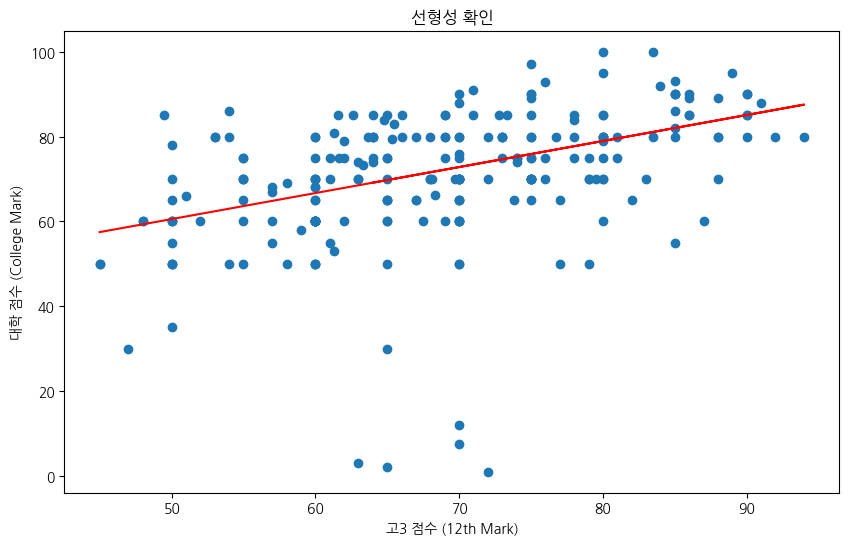

In [38]:
import statsmodels.api as sm
X = df['12th Mark']  # 독립 변수
y = df['college mark']  # 종속 변수

# 회귀 모델 적합
X = sm.add_constant(X)  # 절편 추가
model = sm.RLM(y, X).fit()
predictions = model.predict(X)
residuals = y - predictions

# 1. 선형성 확인
plt.figure(figsize=(10, 6))
plt.scatter(X.iloc[:, 1], y, label='Observed Data')
plt.plot(X.iloc[:, 1], predictions, color='red', label='Fitted Line')
plt.title('선형성 확인')
plt.xlabel('고3 점수 (12th Mark)')
plt.ylabel('대학 점수 (College Mark)')

C:\ProgramData\Anaconda3\envs\sda2024\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


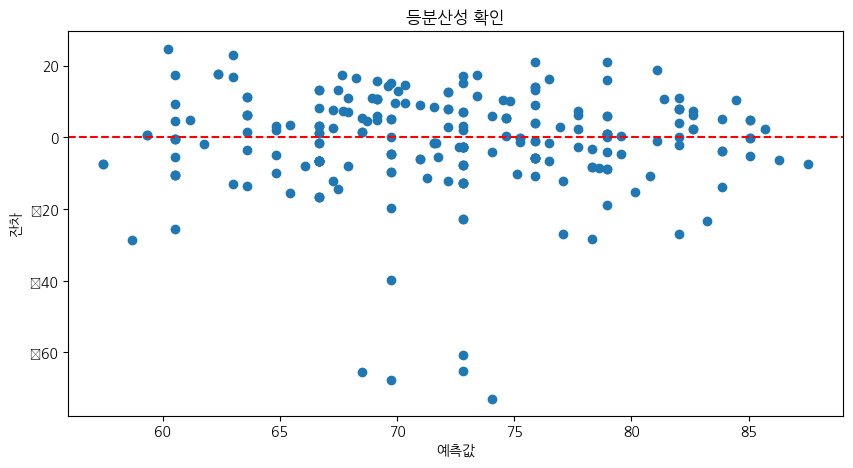

In [39]:
# 3. 등분산성 확인
plt.figure(figsize=(10, 5))
plt.scatter(predictions, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('등분산성 확인')
plt.xlabel('예측값')
plt.ylabel('잔차')
plt.show()

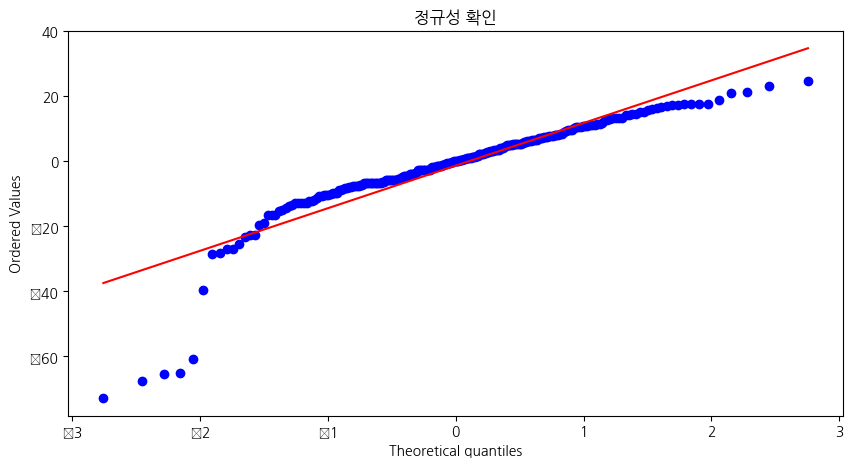

In [42]:
from scipy import stats
# 4. 정규성 확인
plt.figure(figsize=(10, 5))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("정규성 확인")
plt.show()

In [43]:
import statsmodels.api as sm
# 회귀 분석
X = sm.add_constant(df['12th Mark']) 
model = sm.OLS(df['college mark'], X).fit()  

print(model.summary())

#정규성, 등분산성 만족하지 않으므로 OLS 사용하지 않고 RLM 사용

                            OLS Regression Results                            
Dep. Variable:           college mark   R-squared:                       0.180
Model:                            OLS   Adj. R-squared:                  0.177
Method:                 Least Squares   F-statistic:                     51.31
Date:                Sat, 07 Dec 2024   Prob (F-statistic):           1.03e-11
Time:                        04:58:26   Log-Likelihood:                -957.08
No. Observations:                 235   AIC:                             1918.
Df Residuals:                     233   BIC:                             1925.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         28.9546      5.896      4.911      0.0

In [44]:
import statsmodels.api as sm
# 회귀 분석
X = sm.add_constant(df['12th Mark'])  
model = sm.RLM(df['college mark'], X).fit()  

print(model.summary())

                    Robust linear Model Regression Results                    
Dep. Variable:           college mark   No. Observations:                  235
Model:                            RLM   Df Residuals:                      233
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 07 Dec 2024                                         
Time:                        04:58:33                                         
No. Iterations:                    15                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.8736      4.532      6.591      0.0